In [122]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import os

#Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

#To plot the graph embedded in the notebook
%matplotlib inline

In [123]:
# https://thinkingneuron.com/boston-housing-price-prediction-case-study-in-python/

In [124]:
# Reading the dataset

print(os.getcwd())
os.chdir(os.path.dirname("C:\\Users\\User\\Desktop\\Data Science\\data\\"))
print(os.getcwd())

BostonData=pd.read_csv('BostonHousingData.csv', encoding='latin')

print('Shape before deleting duplicate values:', BostonData.shape)

# Removing duplicate rows if any
BostonData=BostonData.drop_duplicates()
print('Shape After deleting duplicate values:', BostonData.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
BostonData.head(10)

C:\Users\User\Desktop\Data Science\data
C:\Users\User\Desktop\Data Science\data
Shape before deleting duplicate values: (506, 14)
Shape After deleting duplicate values: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [125]:
print('Shape')
print(BostonData.shape)
print('\n Describe ')
print(BostonData.describe)
# print('\n')
# print(BostonData.feature_names)
print('\n Keys ')
print(BostonData.keys())
print(' \n Info')
print(BostonData.info())
print(' \n Uniques')
BostonData.nunique()

Shape
(506, 14)

 Describe 
<bound method NDFrame.describe of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

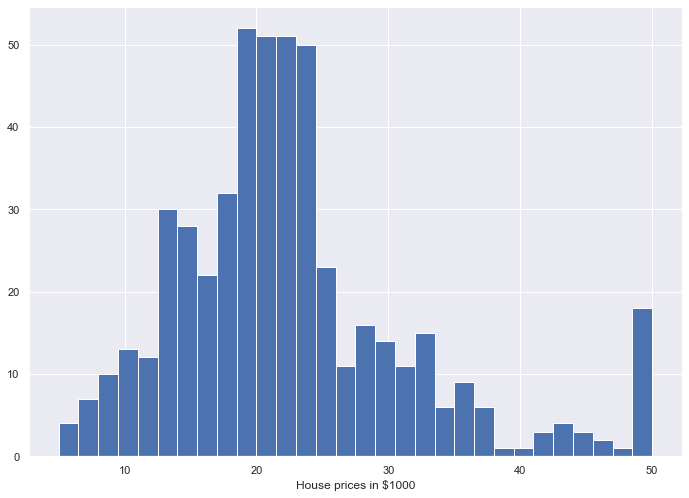

In [126]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.hist(BostonData['MEDV'], bins=30)
plt.xlabel("House prices in $1000")
plt.show()

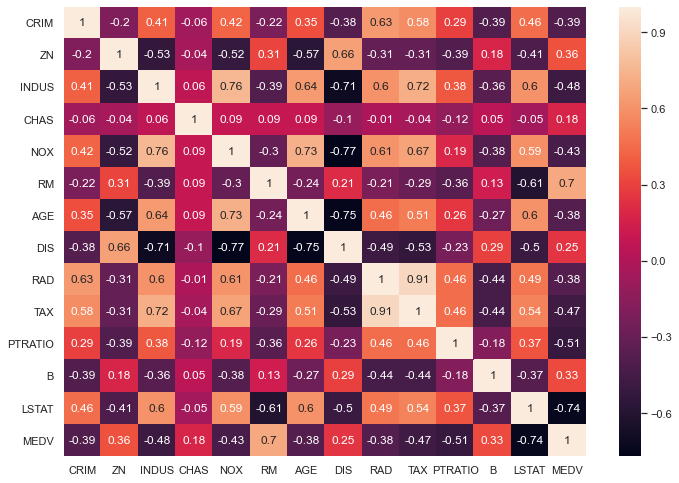

In [127]:
correlation_matrix = BostonData.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [128]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
# reduce the 0.5 threshold if no variable is selected
correlation_matrix['MEDV'][abs(correlation_matrix['MEDV']) > 0.5 ]

RM         0.70
PTRATIO   -0.51
LSTAT     -0.74
MEDV       1.00
Name: MEDV, dtype: float64

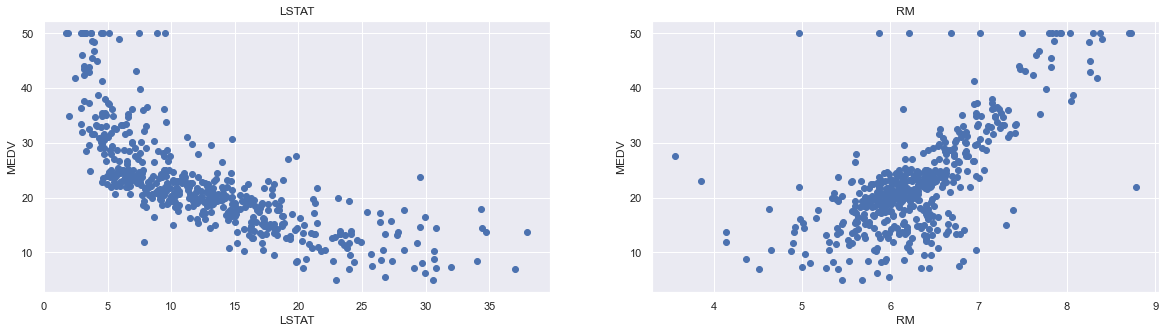

In [129]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = BostonData['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = BostonData[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018096419C88>,
      dtype=object)

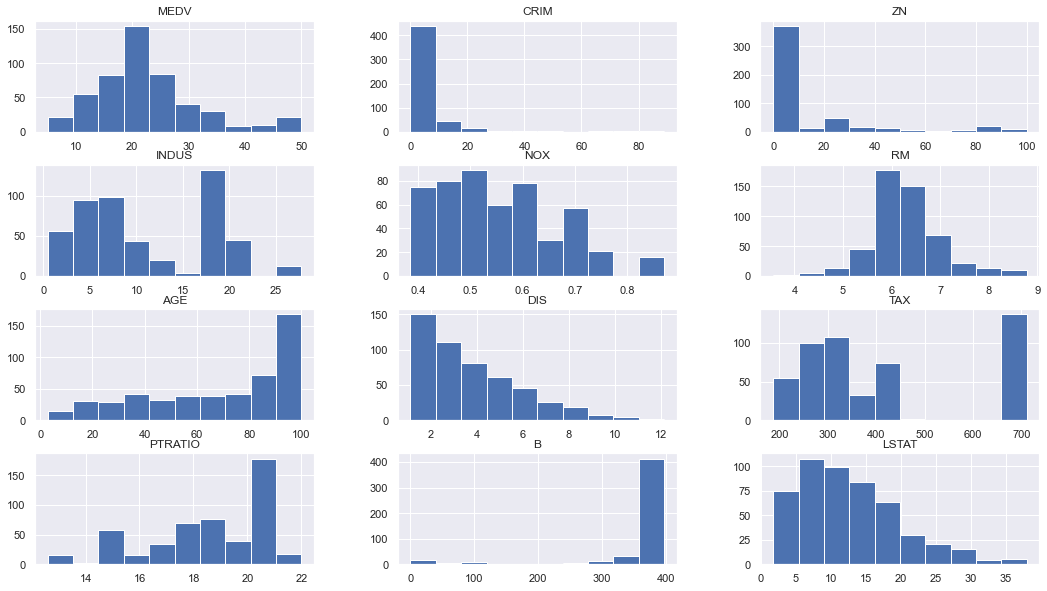

In [130]:
# Plotting histograms of multiple columns together
BostonData.hist(['MEDV', 'CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX',
                 'PTRATIO', 'B', 'LSTAT'], figsize=(18,10))

In [131]:
# are there any blank values? no.
BostonData.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [132]:
# Finding nearest values to 60 mark
BostonData['CRIM'][BostonData['CRIM']<60].sort_values(ascending=False)

410    51.13580
414    45.74610
404    41.52920
398    38.35180
427    37.66190
         ...   
55      0.01311
341     0.01301
285     0.01096
284     0.00906
0       0.00632
Name: CRIM, Length: 503, dtype: float64

In [133]:
BostonData['CRIM'][BostonData['CRIM']>=60].sort_values(ascending=False)

380    88.9762
418    73.5341
405    67.9208
Name: CRIM, dtype: float64

In [134]:
# Replacing outliers with nearest possibe value
BostonData['CRIM'][BostonData['CRIM']>60] =51.13

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018091D782C8>]],
      dtype=object)

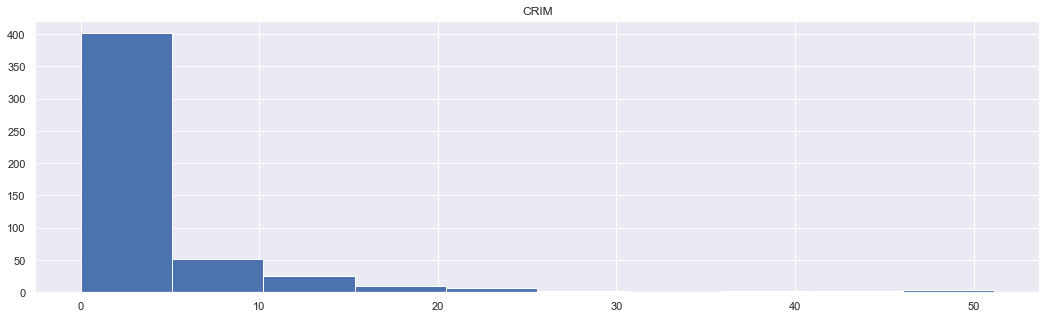

In [135]:
BostonData.hist(['CRIM'], figsize=(18,5))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

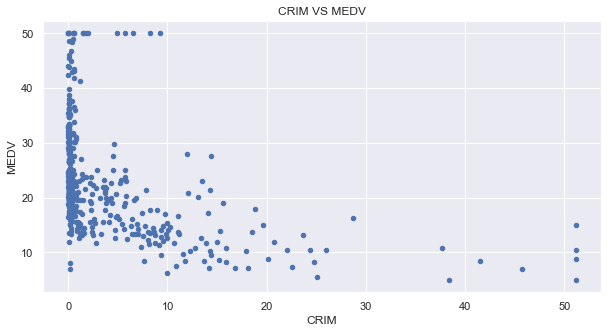

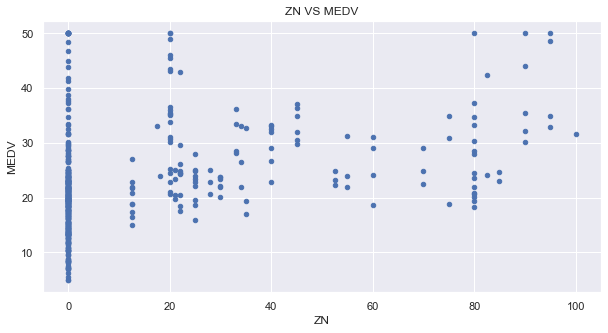

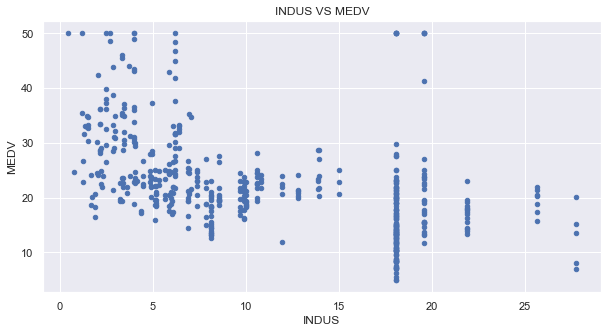

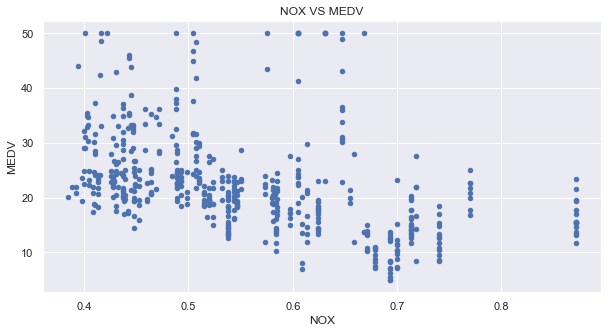

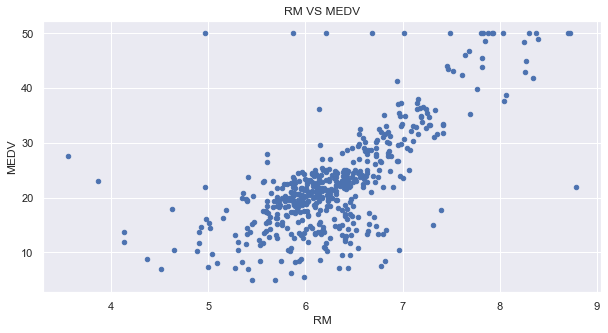

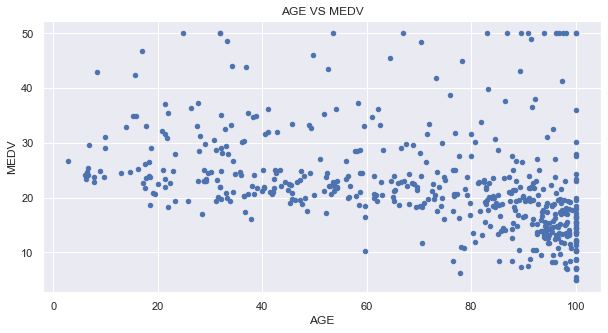

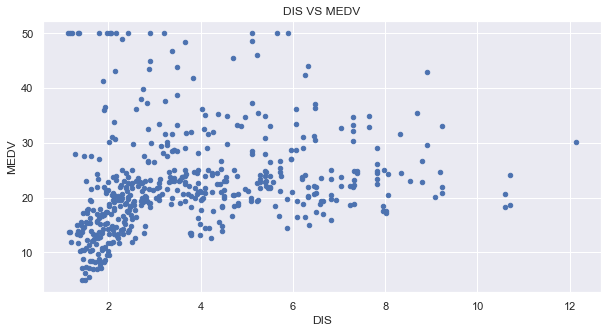

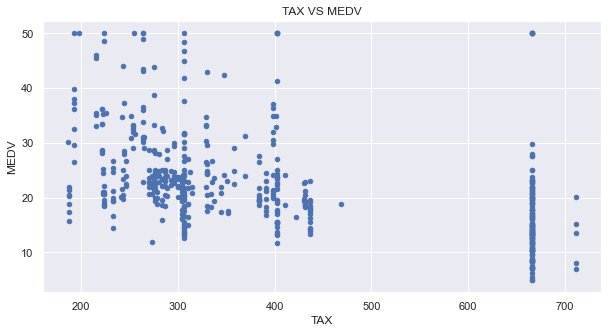

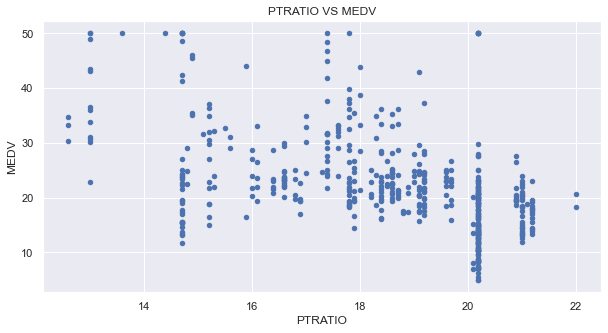

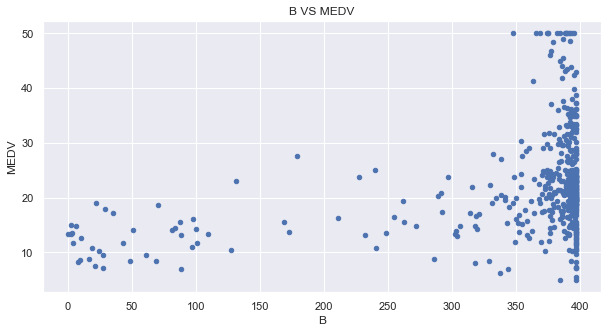

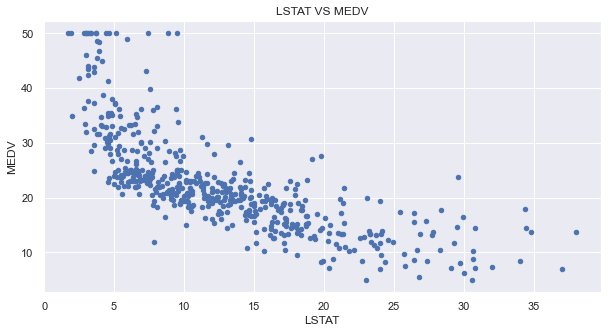

In [136]:
ContinuousCols=['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX',
                 'PTRATIO', 'B', 'LSTAT']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    BostonData.plot.scatter(x=predictor, y='MEDV', figsize=(10,5), title=predictor+" VS "+ 'MEDV')

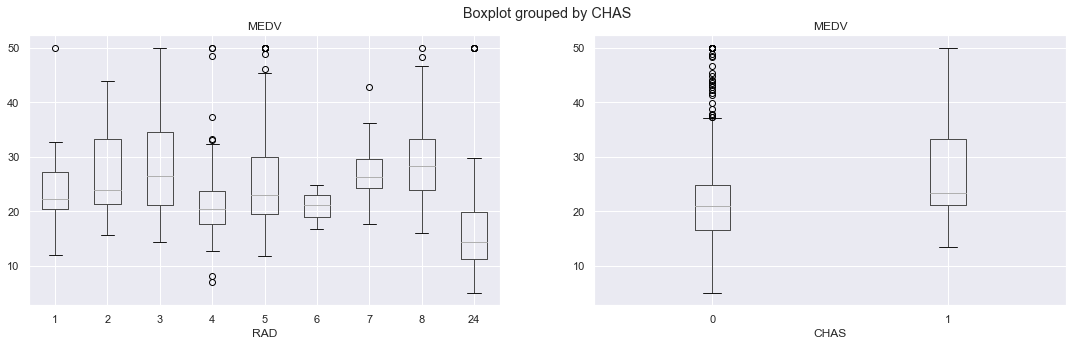

In [137]:
# Box plots for continuous Target Variable "MEDV" and Categorical predictors
CategoricalColsList=['RAD', 'CHAS']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "MEDV"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    BostonData.boxplot(column='MEDV', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

In [138]:
# SelectedColumns=['RM', 'PTRATIO','LSTAT', 'RAD', 'CHAS']
SelectedColumns=['RM', 'PTRATIO','LSTAT']
# SelectedColumns=['RM','LSTAT']

# Selecting final columns
DataForML=BostonData[SelectedColumns]
DataForML.head()

,RM,PTRATIO,LSTAT
0,6.575,15.3,4.98
1,6.421,17.8,9.14
2,7.185,17.8,4.03
3,6.998,18.7,2.94
4,7.147,18.7,5.33


In [139]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')

In [140]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['MEDV']=BostonData['MEDV']

# Printing sample rows
DataForML_Numeric.head()

,RM,PTRATIO,LSTAT,MEDV
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2


In [141]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['RM', 'PTRATIO', 'LSTAT', 'MEDV'], dtype='object')

In [142]:
# Separate Target Variable and Predictor Variables
TargetVariable='MEDV'
Predictors=['RM', 'LSTAT','PTRATIO' ] # ,  'RAD', 'CHAS']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

In [143]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['MEDV']-TestingDataResults['PredictedMEDV']))/TestingDataResults['MEDV'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2 Value: 0.6792180918430368

##### Model Validation and Accuracy Calculations ##########
      RM  LSTAT  PTRATIO  MEDV  PredictedMEDV
0  7.454   3.11     15.9  44.0           35.0
1  6.163  11.34     18.0  21.4           23.0
2  7.327  11.25     13.0  31.0           33.0
3  5.399  30.81     17.9  14.4            9.0
4  6.750   7.74     20.2  23.7           26.0
Mean Accuracy on test data: 80.00727876181317
Median Accuracy on test data: 87.36748130788973

Accuracy values for 10-fold Cross Validation:
 [88.37192572 89.23998008 85.56651342 82.81688229 86.22931798 88.02359532
 84.16099243 48.536584   53.91670842 85.22065221]

Final Average Accuracy of the model: 79.21


XGBRegressor(base_score=None, booster='gbtree', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_delta_step=None, max_depth=2,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, scale_pos_weight=None,
             silent=True, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=0)
R2 Value: 0.9819688440273169

##### Model Validation and Accuracy Calculations ##########
      RM  LSTAT  PTRATIO  MEDV  PredictedMEDV
0  7.454   3.11     15.9  44.0           36.0
1  6.163  11.34     18.0  21.4           23.0
2  7.327  11.25     13.0  31.0           33.0
3 

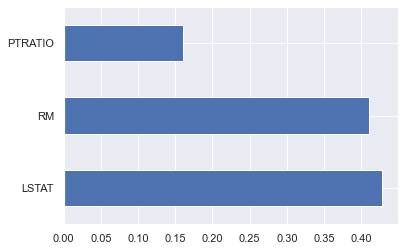

In [144]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2, 
                      learning_rate=0.1, 
                      n_estimators=1000, 
                      objective='reg:linear', 
                      booster='gbtree',
                      silent=True,
                      verbosity = 0)

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['MEDV']-TestingDataResults['PredictedMEDV']))/TestingDataResults['MEDV'])


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))